In [1]:
import sys
sys.path.append("/hpc/projects/group.czii/yue.yu/MyPyLib/")

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

import os 

from EM import *
from PAD import *
from rigidregistration import stackregistration as stackreg


Load data

In [2]:
pad = PAD.PADdata("/hpc/projects/group.czii/yue.yu/tcBF_recon/data/230925/24_700nmdef_8mrad_28p5kx_p2_4p1mCL_m1p14mono_512_1p36nm_stepsize/24_700nmdef_8mrad_28p5kx_p2_4p1mCL_m1p14mono_512_1p36nm_stepsize_concat.raw", EMPAD=2, dim=512)


In [3]:
# bin the data for speed for demonstration
pad.data = pad.data
pad.bin_cbedsTW4D(4)

In [4]:
pad.data.shape

(32, 32, 512, 512)

In [5]:
pad.get_bf()

In [6]:
pad.ca = 8/1000 
pad.pixelsize = 1.1 # nm

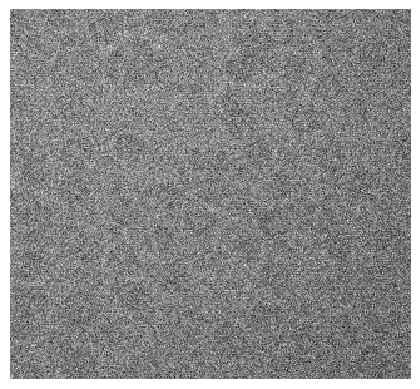

In [21]:
functions.show(
    (pad.bf)[5:300,30:350]
)

Solve for shifts

In [8]:
pad.get_tcBF(radius=0.85, n=3, expand=1)

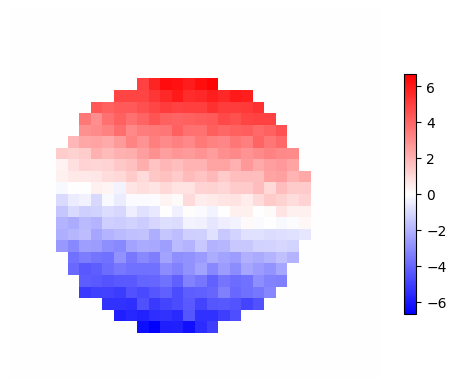

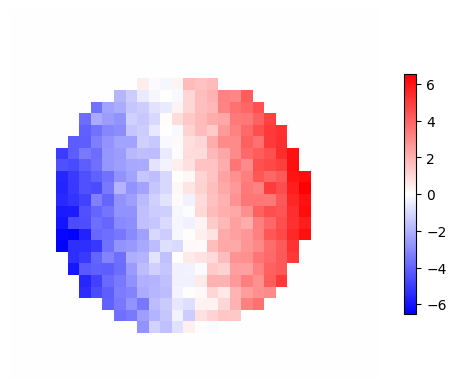

In [9]:
functions.show_map_lower(pad.xshiftmap)
functions.show_map_lower(pad.yshiftmap)

In [10]:
# tcBF without upsampling
im_expand = PADutil.apply_shift_expand(
    pad.stack,
    pad.xshiftmap[np.nonzero(pad.tcmask)],
    pad.yshiftmap[np.nonzero(pad.tcmask)],
    4,
)

In [12]:
tcbf_up4 = im_expand[0]/im_expand[1]

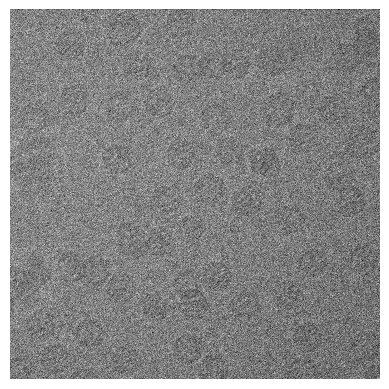

In [20]:
functions.show(
    tcbf_up4[20:1200,120:1300]
              )